#  Projekt zur Datenanalyse_Classification of Wisconsin Breast Cancer

### Table of contents

### chapter 1: Data Preparation

1. Ordinal Encoding- Target variable
       
2. Feature Selecktion-SelectKBest
    1. pearon correlation  
    2. f_classif 
    3. Visualization of Feature selektion 
  
3. Feature Scaling   
   1. Standardization
   2. Normalization
    
### chapter 2: Neural Network

1. Split the dataset
    1. Cross Validation- to overcome overfitting
     
2. Building a model
    1. Input Layers- Hidden layers- Output layers
    2. Compile the model
       1. Optimization Moethod:
           1.Stochastic Gradient Descent
           2. Adam
           3. Learning rate
           
3. Fitting the model
4. Loss- Accuracy
5. Evaluation metrics
    1. Confusion_metrics
    
6. Classification threshold
    1. Adjsting Threshold
    2. ROC und AUC
    3. Visualization of ROC- AUC
7. Interpretation des modelles
    1. Shap analysis
 
### Chapter 3 : Support vector machine
1. Data recuperation
2. Data Visualization
3. Correlation of features
4. Data Selection
5. Fiting the model
6. testing the model
7. tunning the hyperparameters
8. Confusion matrix

###  Chapter 4: k-nearest neighbors

    




### Title: Wisconsin Diagnostic Breast Cancer (WDBC):

###### Dataset  Description:

* **Extracted** : Clinical Sciences Center, Madison, WI 53792.
* Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.
    * Rows :   569 Rows 
    * Columns :33 
* Class distribution: 
    * 357 benign
    * 212 malignant
    
* Here is an overviwe about the Feature :
<a id="infos"></a>
    * id
    * diagnosis
    * radius_mean
    * texture_mean
    * perimeter_mean
    * area_mean
    * smoothness_mean
    * compactness_mean
    * concavity_mean
    * concave points_mean
    * symmetry_mean
    * fractal_dimension_mean
    * radius_se
    * texture_se
    * perimeter_se
    * area_se
    * smoothness_se
    * compactness_se
    * concavity_se
    * concave points_se
    * symmetry_se ,
    * fractal_dimension_se
    * radius_worst
    * texture_worst
    * perimeter_worst
    * area_worst
    * smoothness_worst
    * compactness_worst
    * concavity_worst
    * concave points_worst
    * symmetry_worst
    * fractal_dimension_worst
    * Unnamed: 32

**For more Information :** :[ https://www.downloadmaghaleh.com/wp-content/uploads/edd/maghaleh/1398/yosefi.wisconsin-min.pdf ]

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.impute import SimpleImputer
from scipy import stats
from scipy.stats.stats import pearsonr
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


### Data preparation:

* Data apprearing
* As we notice our target variable is **diagnosis** with String value {**M:malignant** and **B:Benign**}
    * In order to make it easier to read the **output varible** , we transform [M to 1 and B to 0 ]


In [9]:
dt=pd.read_csv('Datasets/set.csv')
dt['diagnosis'] = dt['diagnosis'].map({'M':1,'B':0})
dt.head(4)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN


* In this Step we are going to drop all input variables , that does not make any sense , like **ID or Unamed**

In [10]:
dt.drop('id',axis=1,inplace=True)
dt.drop('Unnamed: 32',axis=1,inplace=True)

In [26]:
target_col='diagnosis'
X=dt.iloc[:,dt.columns!=target_col]
Y=dt['diagnosis']
print('Shape of Input variable is {}'.format(X.shape))
print('Shape of target variable is {}'.format(Y.shape))

Shape of Input variable is (569, 30)
Shape of target variable is (569,)


* Let's check if there is any missing value


In [11]:
dt.isna().sum()# all right we don't have any missing value in out dataset

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

#### Befor we  vizualise our features , there are some information that, we need to know for example std, max, min, mean
* the mean value of area_mean is 654.889104 unlike , smoothness_mean is 0.096360 . so we habe great diffrence on the mean , therfore we should think of Data Standarization or normalization :

**Standarization= (X - X.mean()) / (X.std()) **


In [41]:
X= (X - X.mean()) / (X.std()) 
X.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214


In [42]:
dt.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### Feature Selection:
* Fitting the model with 33 Columns is not only computationally intensive, but also does not make any  sense for the machine to learn inputs that does not play any role by taking decision or  classification.in other wise feature selection improve the accuracy of the model.
* **Goals**: Reducing the number of inputs 
    * One of the most using Feature selection method is **Filter-Based Feature Selection Methods**  here the Algorithm select a subst of features based on their  Strng relationship, 
    * Pearson's correlation coefficient (linear):well-known correlation is similarity measures between two features. If two features are linearly dependent , then their correlation coefficient is (+-1). If the feature are uncorrelated , the correlation coefficient  is 0
        * Pearsonr : gives us two value , one **pearson correlation score** (help us to measure the dependancy between 2 features ) and **p_value**  gives us the probability of finding an observation under an assumption that a particular hypothesis is True. This probability is used to accept or reject that hypothesis.Removal of different features from the dataset will have diffrent effects on the p_value for the dataset. These measured p_values can be used to decide whether to keep a feature or not. 
#### Frage: How many features should i take?
* may be at the begining i should take (ex:4 features) and after that a should fit my model based on those featutes , and check the accuracy , after that i can add or remove a features to see if my model performe godd or bad ( **TRY OUT**)

#### Split the dataset into input and output variable:

Shape of Input variable is (569, 30)
Shape of target variable is (569,)


#### calcul pearson between each input and target :

In [13]:

pearson_list=[]
pearson=[]
for col in X.columns:
        pearson=pearsonr(X[col],Y)
        pearson_list.append([col,pearson[0],pearson[1]])
    
pearson_list 
    
df_pearson=pd.DataFrame(pearson_list,columns=['Features','Pearson_score','P_value'])
df_pearson.sort_values(by=['Pearson_score'],ascending=False)

,Features,Pearson_score,P_value
27,concave points_worst,0.793566,1.969100e-124
22,perimeter_worst,0.782914,5.771397e-119
7,concave points_mean,0.776614,7.101150e-116
20,radius_worst,0.776454,8.482292e-116
2,perimeter_mean,0.742636,8.436251e-101
23,area_worst,0.733825,2.828848e-97
0,radius_mean,0.730029,8.465941e-96
3,area_mean,0.708984,4.734564e-88
6,concavity_mean,0.696360,9.966556e-84
26,concavity_worst,0.659610,2.464664e-72


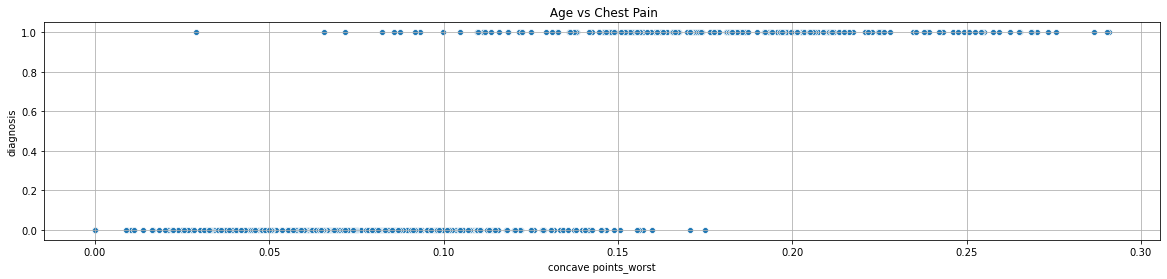

In [17]:
plt.figure(figsize=(20,4))
sns.scatterplot(x=dt['concave points_worst'],y=dt['diagnosis'])
plt.xlabel('concave points_worst')
plt.ylabel('diagnosis')
plt.title(' Age vs Chest Pain')
#plt.axhline(df['chol'].mean(),linestyle='--',color='black')
plt.grid()

In [1]:

#sns.pairplot(dt,hue='diagnosis',vars=['concave points_worst','texture_mean','area_mean','perimeter_mean','smoothness_mean'])

'0.11.2'